# Self-driving cars : analyse des données

### <br>Présentation rapide

> &emsp; Après une attente insoutenable, nous allons enfin pouvoir découvrir les résultats de nos expériences ! Tout s'est-il bien passé ? Quel niveau de la simulation les voitures ont-elles atteint ? A quelle fréquence ? ... <br> 
> &emsp; C'est ce que nous allons voir dans ce notebook. Il est temps, finalement, d'interroger nos données. <br>
> &emsp; Enfin... Presque ! <br>
> &emsp; Toutes les datas sont pour l'instant stockées dans une base de données en ligne. Avant de pouvoir réellement les explorer (parties 2, 3 et 4 de ce notebook), nous allons donc les importer et les nettoyer (partie 1). 

### 1. Importation, nettoyage

> &emsp; A ce moment de l'étude, la quantité de données à notre disposition est encore très limitée. Nous allons voir qu'elle est cependant suffisante pour mettre en place notre code d'acquisition et de sécurisation des datas. <br>
> &emsp; La base de donnée ayant été générée de manière automatique, notre travail est grandement facilité. L'accés aux données est direct. La plupart des erreurs susceptibles de rendre une partie de la data plus difficile ou impossible à exploiter ont déjà été traitées en amont. <br>
> &emsp; Il faut cependant rester vigilant car même ici, dans un cas d'étude simple, cette étape demeure d'une importance capitale.

### 2. Exploration préliminaire : bien régler nos paramètres

> &emsp; Nous souhaitons ensuite utiliser les premiers résultats obtenus pour vérifier si les valeurs des paramètres clés de l'expérience ont été bien choisies. Prenons quelques exemples : <br>
> &emsp; Nos voitures ont-elles un nombre de capteurs suffisant pour pouvoir effectuer la tâche à accomplir ? Ces capteurs sont-ils bien disposés ? Les "cerveaux" des voitures sont-ils suffisamment complexes ? Le sont-ils trop, ce qui ralentirait grandement leur apprentissage ? ... <br>
> &emsp; Ces questions sont au coeur de notre étude. Idéalement, chacun des paramètres mentionné devrait faire l'objet d'une analyse spécifique, si l'on souhaite optimiser au mieux toute l'expérience. Avec les premières données collectées, nous pouvons nous intéresser tout particulièrement au taux de mutation de l'algorithme génétique (appliqué au réseau neuronal de la voiture sélectionnée par la fitness function, après chaque tirage). <br>
> &emsp; La méthode utilisée (analyse univariée d'une variable quantitative discrète) pourra ensuite être appliquée aux autres paramètres, dès que les données nécessaires auront été recueillies. Notons bien qu'elle ne constitue qu'une première approche, limitée : certes, cela nous permet bel et bien de nous "faire une idée de ce qui se passe" lorsqu'on joue sur la valeur de notre paramètres, les valeurs des autres paramètres restant bien sûr égales par ailleurs. Cependant, elle ne permet pas de révéler si l'efficacité du taux de mutation choisi est liée à la valeur d'un autre paramètre. (C'est d'ailleurs sans doute le cas en réalité : le taux de mutation optimal pourrait par exemple diminuer si nous avons la possibilité de générer un nombre plus important d'instances de voitures.) Elle devra être approfondie, complétée, par une recherche de corrélations ultérieure.

### 3. La question fatidique

> &emsp; "Que disent les résultats ??" <br><br>
> &emsp; Il suffit de leur demander : <br>
> &emsp; Imaginons par exemple que, dans le cadre d'une action d'éducation, on souhaite organiser une petite démonstration, pour montrer comment ce type d'IA fonctionne, avec des petites voitures pilotées par des réseaux neuronaux. Nous commençons par utiliser notre simulation virtuelle afin d'étudier la viabilité du projet. <br>
> &emsp; Parmi les contraintes matérielles à prendre en compte, on souhaite connaitre en priorité la quantité d'énergie qui sera nécessaire. En effet, l'énergie va non seulement impacter le prix du projet, mais aussi le déroulement de l'expérience : si les voitures ont besoin de plus d'énergie que prévu, leurs batteries pourraient ne pas suffir. Et personne ne veut voir une "course automobile" où tous les véhicules sont en panne ! <br>
> &emsp; Nous allons donc nous intéresser attentivement à la variable "dist" de nos dataframes, qui est une approximation de la distance parcourue par chaque voiture lors d'un tirage. (Approximation car pour être plus exact, elle correspond à son abscisse finale, ce qui est très différent dans certains cas. Cela n'est toutefois pas un problème ici, notre objectif étant surtout de mettre en place le traitement statistique et une visualisation des données pertinente et claire.) <br>
> &emsp; Exactement comme pour la partie précédente, cette analyse de la distance (analyse univariée d'une variable quantitative continue ou, plus précisément, assimilable à une variable continue) nous offre une compréhention utile mais limitée de ce que nous observons. Pour aller plus loin et répondre enfin de manière satisfaisante aux questions qui sont à l'origine de cette étude, nous allons donc utiliser des outils d'analyse plus puissants.

### 4. Recherche de corrélations

> &emsp; Nous tenterons de déterminer s'il existe des liens entre certaines variables produites par l'expérience : distance parcourue, temps de survie, score, survie (bouléen). 


# <a id="toc">Table des matières</a>

### <br>1. Importation, nettoyage

- [Acquisition des données (backend numpy)](#1.1)
- [Comparaison : acquisition des données (backend pyarrow)](#1.2)
- [Importation](#1.3)
- [Affichage / premières vérifications du résultat de l'importation](#1.4)
- [Regroupement des tables fragmentées](#1.5)
- [Détection d'autres erreurs](#1.6)

### 2. Exploration préliminaire

- [Définition d'un critère de performance, premières visualisations](#2.1)
- [Comparaison des expériences, en fonction du taux de mutation](#2.2)
- [Conclusion : quel taux choisir pour notre experience ?](#2.3)

### 3. Distance parcourue

- [importation de nouvelles tables, plus complètes](#3.1)
- [distribution empirique](#3.2)
- [évolution de la distribution empirique](#3.3)
- [mesures de tendance centrale, dispersion, forme](#3.4)
- [mesures de concentration](#3.5)

### 4. Recherche de corrélations entre...

- [...distance et temps de survie](#4.1)
- [...distance et classement à l'arrivée (ANOVA)](#4.2)
- [...classement et survie (Chi-2)](#4.3)

> [Conclusion](#4.4)   

> [Annexes](#5.1)

> [Ressources](#5.2)  


### <a id="1.1">[1.1 Acquisition des données (numpy)](#toc)</a>

In [1]:
# Nous allons utiliser plusieurs tables correspondant aux résultats d'expériences aux conditions identiques
# (5 sensors, 6 hidden neurons, 1000 cars, 2000 frames max, ouverture 0.40)
# à l'exception du taux de mutation qui varie entre 0.10 et 0.30 

# Pyarrow nécessite la dernière version de pandas
!pip install --upgrade --pre pandas==2.0.0rc0

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as st
print(pd.__version__)

def importData(nom):
    df = pd.read_csv(nom,names=["id", "rep", "tir", "car", "score", "dist"])
    df.name = nom
    print(nom + " a bien été importé.")
    return df

%timeit carsMut10part1 = importData('csv/cars_s5h6o40m10_p1.csv')


2.0.0rc0
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/

### <a id="1.2">[1.2 Acquisition des données (pyarrow)](#toc)</a>

In [2]:
# Testons au passage les performances du backend Apache Arrow qu'utilise Pandas 2.0, disponible depuis peu
# Le temps d'exécution par la "méthode "traditionnelle" (backup : array numpy) 
# est généralement compris entre 30 et 40 ms.

# !pip install -U pyarrow
pd.options.mode.dtype_backend = 'pyarrow'

%timeit carsMut10part1 = importData('csv/cars_s5h6o40m10_p1.csv')


csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6

### <a id="1.3">[1.3 Importation](#toc)</a>

In [3]:
# Il semble que les gains de performance que l'ont peut observer sur des jeux de données plus importants
# ne sont pas forcément très significatifs ici. Nous pourrions tout de même utiliser le backend arrow,
# car il permet aussi d'autres apports intéressants. Par exemple en modifiant le paramètre use_nullable_dtypes
# de la fonction pd.read_csv(), on peut notamment éviter des comportements imprévus.
# (comme la modification silencieuse du type de certaines données à cause de valeurs manquantes.)

# Pour assurer la compatibilité de ce notebook, nous allons cependant continuer pour l'instant à utiliser numpy.

pd.options.mode.dtype_backend = 'pandas'

carsMut10part1 = importData('csv/cars_s5h6o40m10_p1.csv') # La variable du même nom plus haut est locale %timeit
carsMut10part2 = importData('csv/cars_s5h6o40m10_p2.csv')
carsMut10part3 = importData('csv/cars_s5h6o40m10_p3.csv')
carsMut15 = importData('csv/cars_s5h6o40m15.csv')
carsMut20 = importData('csv/cars_s5h6o40m20.csv')
carsMut25part1 = importData('csv/cars_s5h6o40m25_p1.csv')
carsMut25part2 = importData('csv/cars_s5h6o40m25_p2.csv')
carsMut25part3 = importData('csv/cars_s5h6o40m25_p3.csv')
carsMut30 = importData('csv/cars_s5h6o40m30.csv')
carsMut50 = importData('csv/cars_s5h6o40m50.csv')  


csv/cars_s5h6o40m10_p1.csv a bien été importé.
csv/cars_s5h6o40m10_p2.csv a bien été importé.
csv/cars_s5h6o40m10_p3.csv a bien été importé.
csv/cars_s5h6o40m15.csv a bien été importé.
csv/cars_s5h6o40m20.csv a bien été importé.
csv/cars_s5h6o40m25_p1.csv a bien été importé.
csv/cars_s5h6o40m25_p2.csv a bien été importé.
csv/cars_s5h6o40m25_p3.csv a bien été importé.
csv/cars_s5h6o40m30.csv a bien été importé.
csv/cars_s5h6o40m50.csv a bien été importé.


### <a id="1.4">[1.4 Affichage / premières vérifications du résultat de l'importation](#toc)</a>

In [4]:
def displayImport(df):
    print(df.name)        # pour ne pas se perdre
    display(df.nunique()) # informations principales
    display(df.info())    # + compte non-nuls et types des variables, df.dtypes() pas nécessaire du coup
    display(df.tail(15))  # certaines tables sont incomplètes

displayImport(carsMut10part1)
displayImport(carsMut10part2)
displayImport(carsMut10part3)
displayImport(carsMut15)
displayImport(carsMut20)
displayImport(carsMut25part1)
displayImport(carsMut25part2)
displayImport(carsMut25part3)
displayImport(carsMut30)
displayImport(carsMut20)


csv/cars_s5h6o40m10_p1.csv


id       186000
rep          10
tir          20
car        1000
score         9
dist        161
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186000 entries, 0 to 185999
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   id      186000 non-null  int64
 1   rep     186000 non-null  int64
 2   tir     186000 non-null  int64
 3   car     186000 non-null  int64
 4   score   186000 non-null  int64
 5   dist    186000 non-null  int64
dtypes: int64(6)
memory usage: 8.5 MB


None

,id,rep,tir,car,score,dist
185985,185986,10,6,985,0,0
185986,185987,10,6,986,0,0
185987,185988,10,6,987,0,0
185988,185989,10,6,988,0,0
185989,185990,10,6,989,1,0
185990,185991,10,6,990,0,0
185991,185992,10,6,991,2,0
185992,185993,10,6,992,0,0
185993,185994,10,6,993,3,0
185994,185995,10,6,994,0,0


csv/cars_s5h6o40m10_p2.csv


id       186000
rep          10
tir          20
car        1000
score         9
dist        161
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186000 entries, 0 to 185999
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   id      186000 non-null  int64
 1   rep     186000 non-null  int64
 2   tir     186000 non-null  int64
 3   car     186000 non-null  int64
 4   score   186000 non-null  int64
 5   dist    186000 non-null  int64
dtypes: int64(6)
memory usage: 8.5 MB


None

,id,rep,tir,car,score,dist
185985,185986,10,6,985,0,0
185986,185987,10,6,986,0,0
185987,185988,10,6,987,0,0
185988,185989,10,6,988,0,0
185989,185990,10,6,989,1,0
185990,185991,10,6,990,0,0
185991,185992,10,6,991,2,0
185992,185993,10,6,992,0,0
185993,185994,10,6,993,3,0
185994,185995,10,6,994,0,0


csv/cars_s5h6o40m10_p3.csv


id       400000
rep          20
tir          20
car        1000
score         8
dist        266
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   id      400000 non-null  int64
 1   rep     400000 non-null  int64
 2   tir     400000 non-null  int64
 3   car     400000 non-null  int64
 4   score   400000 non-null  int64
 5   dist    400000 non-null  int64
dtypes: int64(6)
memory usage: 18.3 MB


None

,id,rep,tir,car,score,dist
399985,399986,20,20,985,0,0
399986,399987,20,20,986,1,0
399987,399988,20,20,987,0,0
399988,399989,20,20,988,0,0
399989,399990,20,20,989,0,0
399990,399991,20,20,990,0,0
399991,399992,20,20,991,0,0
399992,399993,20,20,992,0,0
399993,399994,20,20,993,0,0
399994,399995,20,20,994,0,0


csv/cars_s5h6o40m15.csv


id       607000
rep          31
tir          20
car        1000
score         8
dist        362
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607000 entries, 0 to 606999
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   id      607000 non-null  int64
 1   rep     607000 non-null  int64
 2   tir     607000 non-null  int64
 3   car     607000 non-null  int64
 4   score   607000 non-null  int64
 5   dist    607000 non-null  int64
dtypes: int64(6)
memory usage: 27.8 MB


None

,id,rep,tir,car,score,dist
606985,606986,31,7,985,0,0
606986,606987,31,7,986,0,0
606987,606988,31,7,987,1,0
606988,606989,31,7,988,0,0
606989,606990,31,7,989,1,0
606990,606991,31,7,990,0,0
606991,606992,31,7,991,2,0
606992,606993,31,7,992,0,0
606993,606994,31,7,993,0,0
606994,606995,31,7,994,1,0


csv/cars_s5h6o40m20.csv


id       526000
rep          27
tir          20
car        1000
score         8
dist        346
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526000 entries, 0 to 525999
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   id      526000 non-null  int64
 1   rep     526000 non-null  int64
 2   tir     526000 non-null  int64
 3   car     526000 non-null  int64
 4   score   526000 non-null  int64
 5   dist    526000 non-null  int64
dtypes: int64(6)
memory usage: 24.1 MB


None

,id,rep,tir,car,score,dist
525985,525986,27,6,985,0,0
525986,525987,27,6,986,0,0
525987,525988,27,6,987,0,0
525988,525989,27,6,988,0,0
525989,525990,27,6,989,1,0
525990,525991,27,6,990,0,0
525991,525992,27,6,991,0,0
525992,525993,27,6,992,0,0
525993,525994,27,6,993,0,0
525994,525995,27,6,994,0,0


csv/cars_s5h6o40m25_p1.csv


id       500000
rep          25
tir          20
car        1000
score         8
dist        383
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   id      500000 non-null  int64
 1   rep     500000 non-null  int64
 2   tir     500000 non-null  int64
 3   car     500000 non-null  int64
 4   score   500000 non-null  int64
 5   dist    500000 non-null  int64
dtypes: int64(6)
memory usage: 22.9 MB


None

,id,rep,tir,car,score,dist
499985,499986,25,20,985,0,0
499986,499987,25,20,986,0,0
499987,499988,25,20,987,0,0
499988,499989,25,20,988,0,0
499989,499990,25,20,989,0,0
499990,499991,25,20,990,0,0
499991,499992,25,20,991,0,0
499992,499993,25,20,992,0,0
499993,499994,25,20,993,0,2894
499994,499995,25,20,994,0,0


csv/cars_s5h6o40m25_p2.csv


id       127000
rep           7
tir          20
car        1000
score         5
dist        238
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127000 entries, 0 to 126999
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   id      127000 non-null  int64
 1   rep     127000 non-null  int64
 2   tir     127000 non-null  int64
 3   car     127000 non-null  int64
 4   score   127000 non-null  int64
 5   dist    127000 non-null  int64
dtypes: int64(6)
memory usage: 5.8 MB


None

,id,rep,tir,car,score,dist
126985,126986,7,7,985,0,0
126986,126987,7,7,986,0,0
126987,126988,7,7,987,0,0
126988,126989,7,7,988,0,0
126989,126990,7,7,989,0,0
126990,126991,7,7,990,0,0
126991,126992,7,7,991,0,0
126992,126993,7,7,992,0,0
126993,126994,7,7,993,0,0
126994,126995,7,7,994,0,0


csv/cars_s5h6o40m25_p3.csv


id       40000
rep          2
tir         20
car       1000
score        5
dist       141
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      40000 non-null  int64
 1   rep     40000 non-null  int64
 2   tir     40000 non-null  int64
 3   car     40000 non-null  int64
 4   score   40000 non-null  int64
 5   dist    40000 non-null  int64
dtypes: int64(6)
memory usage: 1.8 MB


None

,id,rep,tir,car,score,dist
39985,39986,2,20,985,0,0
39986,39987,2,20,986,0,0
39987,39988,2,20,987,0,0
39988,39989,2,20,988,0,0
39989,39990,2,20,989,0,0
39990,39991,2,20,990,0,0
39991,39992,2,20,991,0,0
39992,39993,2,20,992,0,0
39993,39994,2,20,993,0,0
39994,39995,2,20,994,0,0


csv/cars_s5h6o40m30.csv


id       400000
rep          20
tir          20
car        1000
score         8
dist        368
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   id      400000 non-null  int64
 1   rep     400000 non-null  int64
 2   tir     400000 non-null  int64
 3   car     400000 non-null  int64
 4   score   400000 non-null  int64
 5   dist    400000 non-null  int64
dtypes: int64(6)
memory usage: 18.3 MB


None

,id,rep,tir,car,score,dist
399985,399986,20,20,985,0,0
399986,399987,20,20,986,0,0
399987,399988,20,20,987,0,0
399988,399989,20,20,988,1,0
399989,399990,20,20,989,0,0
399990,399991,20,20,990,0,0
399991,399992,20,20,991,0,0
399992,399993,20,20,992,0,0
399993,399994,20,20,993,0,0
399994,399995,20,20,994,0,0


csv/cars_s5h6o40m20.csv


id       526000
rep          27
tir          20
car        1000
score         8
dist        346
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526000 entries, 0 to 525999
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   id      526000 non-null  int64
 1   rep     526000 non-null  int64
 2   tir     526000 non-null  int64
 3   car     526000 non-null  int64
 4   score   526000 non-null  int64
 5   dist    526000 non-null  int64
dtypes: int64(6)
memory usage: 24.1 MB


None

,id,rep,tir,car,score,dist
525985,525986,27,6,985,0,0
525986,525987,27,6,986,0,0
525987,525988,27,6,987,0,0
525988,525989,27,6,988,0,0
525989,525990,27,6,989,1,0
525990,525991,27,6,990,0,0
525991,525992,27,6,991,0,0
525992,525993,27,6,992,0,0
525993,525994,27,6,993,0,0
525994,525995,27,6,994,0,0


### <a id="1.5">[1.5 Regroupement des tables fragmentées](#toc)</a>

In [5]:
# On remarque immédiatement deux chose importantes :
# 2 df sont identiques, et plusieurs sont incomplets, certaines expériences ayant été interrompues. 

# df identiques : carsMut10part2 est en doublon. Il suffit de ne pas l'utiliser.
# Pour les df issus de tables incomplètes, le mieux est de tronquer.
# (On perd ainsi seulement la dernière itération de l'expérience, qui était en cours d'exécution.)

carsMut10part1 = carsMut10part1.loc[(carsMut10part1['rep']<10),:]
# part2 en doublon, la partie 3 est complète

carsMut15 = carsMut15.loc[(carsMut15['rep']<31),:]
carsMut20 = carsMut20.loc[(carsMut20['rep']<27),:]

# carsMut25part1 ok
carsMut25part2 = carsMut25part2.loc[(carsMut25part2['rep']<7),:]
# carsMut25part3 ok

# Il ne reste qu'à regrouper les données, par simple concaténation
# (après avoir modifié le compteur de répétition et les id)

carsMut10part3['rep'] += 10
carsMut10part3['id'] += 10*20000
carsMut10 = pd.concat([carsMut10part1, carsMut10part3], ignore_index=True)
carsMut10.name = "s5h6o40m10"
display(carsMut10)

carsMut25part2['rep'] += 25
carsMut25part2['id'] += 25*20000 # nb rep * nb tir * nb cars
carsMut25part3['rep'] += 31
carsMut25part3['id'] += 31*20000
carsMut25 = pd.concat([carsMut25part1, carsMut25part2, carsMut25part3], ignore_index=True)
carsMut25.name = "s5h6o40m25"
display(carsMut25)


,id,rep,tir,car,score,dist
0,1,1,1,0,0,2894
1,2,1,1,1,0,0
2,3,1,1,2,0,0
3,4,1,1,3,0,2894
4,5,1,1,4,0,0
...,...,...,...,...,...,...
579995,599996,30,20,995,0,0
579996,599997,30,20,996,0,0
579997,599998,30,20,997,0,0
579998,599999,30,20,998,0,0


,id,rep,tir,car,score,dist
0,1,1,1,0,0,0
1,2,1,1,1,0,2894
2,3,1,1,2,0,2894
3,4,1,1,3,0,0
4,5,1,1,4,0,2894
...,...,...,...,...,...,...
659995,659996,33,20,995,0,0
659996,659997,33,20,996,0,0
659997,659998,33,20,997,0,0
659998,659999,33,20,998,0,0


### <a id="1.6">[1.6 Détection d'autres erreurs](#toc)</a>

In [6]:
    # Erreurs de type

# OK, vérifié lors de l'importation
    
    # Détecter les éventuelles valeurs manquantes
    
print(carsMut10.isnull().sum())
print(carsMut15.isnull().sum())
print(carsMut20.isnull().sum())
print(carsMut25.isnull().sum())
print(carsMut30.isnull().sum())
print(carsMut50.isnull().sum())

    # Détecter les doublons : ici nous avons une clé, 'id'

print("\nDoublons ?")
print(carsMut10.loc[carsMut10['id'].duplicated(keep=False),:].shape[0])
print(carsMut15.loc[carsMut15['id'].duplicated(keep=False),:].shape[0])
print(carsMut20.loc[carsMut20['id'].duplicated(keep=False),:].shape[0])
print(carsMut25.loc[carsMut25['id'].duplicated(keep=False),:].shape[0])
print(carsMut30.loc[carsMut30['id'].duplicated(keep=False),:].shape[0])
print(carsMut50.loc[carsMut50['id'].duplicated(keep=False),:].shape[0])
# OK, mais... dans une version antérieure du code, j'avais oublié de renommer certains id
# la concaténation avait donc effacé une partie des données, c'est ici que je m'en suis aperçu.

    # Outliers parmi les résultats ?

display(carsMut10['score'].value_counts().sort_index())
display(carsMut10['dist'].value_counts().sort_index())
# Les plus attentifs l'avaient peut-être déjà remarqué : paradoxalement, nous avons ici 
# quelque chose qui devrait être un outlier, mais ne l'est pas. Mais alors, pas du tout.
# Il y a, par rapport aux valeurs constatées en suivant les répétions de l'expérience,
# beaucoup trop de valeurs nulles pour la distance. 
# Après enquête, il s'avère que cette variable était stockée par erreur comme non signée dans la db
# Toutes les valeurs strictement négatives ont donc été perdues (= 0).
# Le problème est cependant très facile à résoudre, maintenant qu'il est identifié.
# Voila, c'est réparé !

# Le jeu de données semble propre, on peut avancer sur la partie analyse.


id       0
rep      0
tir      0
car      0
score    0
dist     0
dtype: int64
id       0
rep      0
tir      0
car      0
score    0
dist     0
dtype: int64
id       0
rep      0
tir      0
car      0
score    0
dist     0
dtype: int64
id       0
rep      0
tir      0
car      0
score    0
dist     0
dtype: int64
id       0
rep      0
tir      0
car      0
score    0
dist     0
dtype: int64
id       0
rep      0
tir      0
car      0
score    0
dist     0
dtype: int64

Doublons ?
0
0
0
0
0
0


score
0    460630
1     91887
2     15784
3      9421
4      1827
5        62
6        93
7       279
8        17
Name: count, dtype: int64

dist
0       568243
1          426
2           61
3          264
4           41
         ...  
4497         1
4535         1
4633         1
4635         1
4663         1
Name: count, Length: 281, dtype: int64

### <a id="2.1">[2.1 Critère de performance](#toc)</a>

df : Score max
m10: 8
m15: 8
m20: 7
m25: 7
m30: 7
m50: 4


score
0    460630
1     91887
2     15784
3      9421
4      1827
7       279
6        93
5        62
8        17
Name: count, dtype: int64

580000


score
0    0.794190
1    0.158426
2    0.027214
3    0.016243
4    0.003150
7    0.000481
6    0.000160
5    0.000107
8    0.000029
Name: proportion, dtype: float64

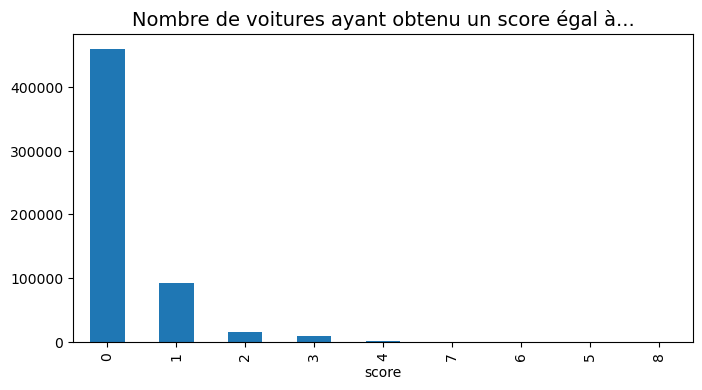

In [7]:
# Nous allons utiliser le score réalisé par la meilleure voiture. 
# Nous avons donc naturellement un critère similaire à la fitness fonction, mais plus simple
# (puisqu'on n'a pas besoin de sélectionner une seule voiture ici)

# On a envie de savoir... quel score max ont-elle atteint ?

print("df : Score max")
print("m10: " + str(carsMut10["score"].max()))
print("m15: " + str(carsMut15["score"].max()))
print("m20: " + str(carsMut20["score"].max()))
print("m25: " + str(carsMut25["score"].max()))
print("m30: " + str(carsMut30["score"].max()))
print("m50: " + str(carsMut50["score"].max()))
 
# Plus généralement, quels sont les scores ?
# Observons la distibution empirique de notre variable (avec matplotlib pour commencer)

display(carsMut10.score.value_counts())
print(carsMut10.score.value_counts().sum())
display(carsMut10.score.value_counts(normalize=True))


plt.figure(figsize=(8, 4))
plt.title("Nombre de voitures ayant obtenu un score égal à...", fontsize=14)
carsMut10.score.value_counts().plot(kind='bar')
plt.show()


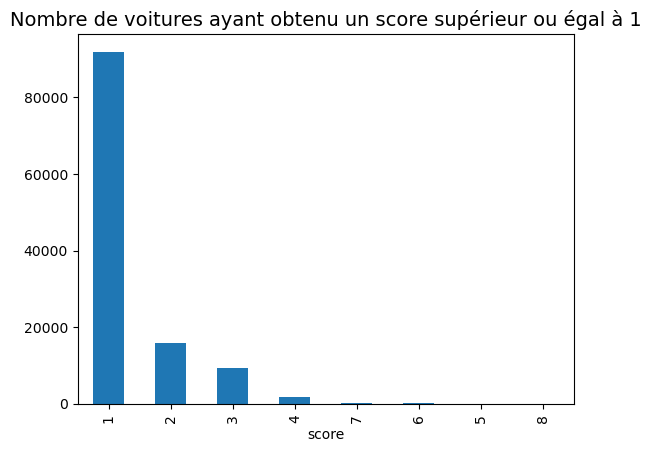

In [8]:
# Intéressant ! Le diagramme est bien accord avec ce que nous avons observé
# L'immense majorité des voiture (460 630 sur 580 000, soit presque 80%) a obtenu un score nul.
# Environ 16% des voitures (moins d'une sur 6) a réussi à franchir le premier "obstacle" (0)
# Ensuite, les effectifs associés diminuent tellement que le diagramme devient impossible à lire.
# Tentons de remédier à cela en ignorant l'obstacle 0

plt.title("Nombre de voitures ayant obtenu un score supérieur ou égal à 1", fontsize=14)
carsMut10_subset = carsMut10.loc[carsMut10["score"] >= 1, "score"]
carsMut10_subset.value_counts().plot(kind='bar')
plt.show()


### <a id="2.2">[2.2 Comparaison des expériences, en fonction du taux de mutation](#toc)</a>

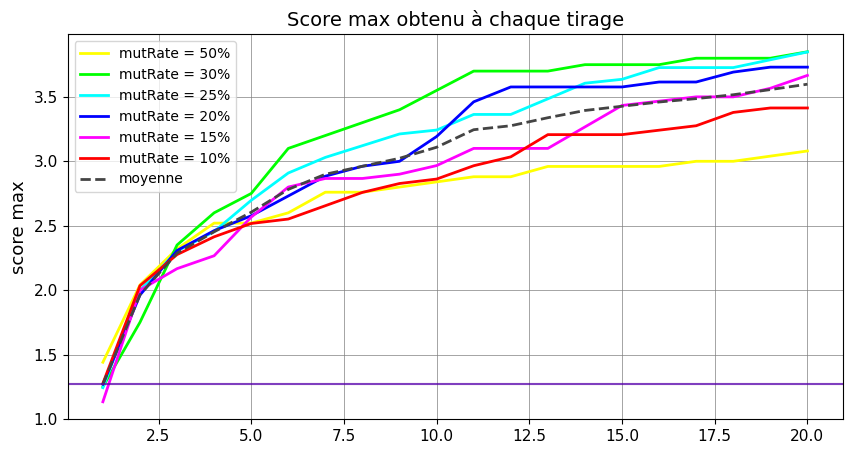

In [9]:
# Décidément, la chute est brutale ! On pouvait déjà s'en apercevoir avec la distibution empirique,
# mais le diagramme permet de prendre la mesure de l'infime fréquence des voitures manifestant 
# le comportement recherché. Il est cependant difficile d'y représenter l'expérience dans son ensemble.

# Pour mieux visualiser ce qui nous intéresse, nous allons tracer quelques courbes,
# afin de comparer nos expériences, et observer l'influence du taux de mutation.
# Les tables sont de tailles différentes. Nous allons donc comparer les scores obtenus *en moyenne*

# score max obtenu pour chaque tirage de chaque repetition
def getBestScore(truc):
    machin = truc.groupby(['rep', 'tir']).max()
    machin.reset_index(inplace=True)
    return machin

scoreMut10 = getBestScore(carsMut10)
scoreMut15 = getBestScore(carsMut15)
scoreMut20 = getBestScore(carsMut20)
scoreMut25 = getBestScore(carsMut25)
scoreMut30 = getBestScore(carsMut30)
scoreMut50 = getBestScore(carsMut50)

# moyenne par tirage
def meanBestScore(truc):
    machin = truc.groupby(['tir']).mean()
    machin.reset_index(inplace=True)
    return machin

meanScoreMut10 = meanBestScore(scoreMut10)
meanScoreMut15 = meanBestScore(scoreMut15)
meanScoreMut20 = meanBestScore(scoreMut20)
meanScoreMut25 = meanBestScore(scoreMut25)
meanScoreMut30 = meanBestScore(scoreMut30)
meanScoreMut50 = meanBestScore(scoreMut50)
#display(meanScoreMut10)

# Préparons une ligne pour visualiser la moyenne. Ou plutôt, ici, la "moyenne moyenne"
moy = {'tir': np.arange(1, 21), 'score': np.zeros(20)}
meanScoreMut = pd.DataFrame(data=moy, index=np.arange(20))
meanScoreMut['score'] = (meanScoreMut10['score'] 
                         + meanScoreMut15['score'] 
                         + meanScoreMut20['score'] 
                         + meanScoreMut25['score'] 
                         + meanScoreMut30['score'] 
                         + meanScoreMut50['score']) / 6

# ajoutons aussi les cas extrêmes :
# si le taux est nul, après selection de la meilleure voiture, les 19 tirages restants seront identiques
taux0 = meanScoreMut.loc[meanScoreMut["tir"] == 1, "score"].max()
# si le taux est maximal, la selection ne sert plus à rien. Chaque tirage redevient complètement aléatoire
taux1 = meanScoreMut.loc[meanScoreMut["tir"] == 1, "score"].mean()

# Affichons les résultats
plt.figure(figsize=(10, 5))
plt.plot(meanScoreMut50['tir'], meanScoreMut50['score'], label='mutRate = 50%', linewidth=2, linestyle='-', color='#ffff00')
plt.plot(meanScoreMut30['tir'], meanScoreMut30['score'], label='mutRate = 30%', linewidth=2, linestyle='-', color='#00ff00')
plt.plot(meanScoreMut25['tir'], meanScoreMut25['score'], label='mutRate = 25%', linewidth=2, linestyle='-', color='#00ffff')
plt.plot(meanScoreMut20['tir'], meanScoreMut20['score'], label='mutRate = 20%', linewidth=2, linestyle='-', color='#0000ff')
plt.plot(meanScoreMut15['tir'], meanScoreMut15['score'], label='mutRate = 15%', linewidth=2, linestyle='-', color='#ff00ff')
plt.plot(meanScoreMut10['tir'], meanScoreMut10['score'], label='mutRate = 10%', linewidth=2, linestyle='-', color='#ff0000')
plt.plot(meanScoreMut['tir'], meanScoreMut['score'], label='moyenne', linewidth=2, linestyle='--', color='#444444')
plt.axhline(y=taux0, color='#ff0000', linestyle='-', alpha=0.5)
plt.axhline(y=taux1, color='#0000ff', linestyle='-', alpha=0.5)
plt.title("Score max obtenu à chaque tirage", fontsize=14)
plt.legend(loc='upper left')
#plt.xlabel('Tirages', fontsize=13)
plt.ylabel('score max', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(color='gray', linestyle='-', linewidth=0.5)

plt.show()


### <a id="2.3">[2.3 Conclusion : quel taux choisir pour notre expérience ?](#toc)</a>

> &emsp; Avant tout, rappelons bien que le nombre de répétitions de notre expérience aléatoire n'est pas assez 
important (loin de là) pour appuyer une analyse solide. Cette conclusion est donc provisoire, en attendant que des données suplémentaires viennent la confirmer ou la contredire.<br> 
> &emsp; Ces précautions étant prises, que semble indiquer la data que nous avons collectée ? <br> 
> &emsp; Dans les cas extrêmes (il s'agit de la ligne violette tout en bas : les 2 courbes bleue et rouge sont sont si proches qu'elles paraissent confondues), on peut observer des résultats purement aléatoires. Ainsi, le graphique ci-dessus représente aussi, en quelque sorte, la puissance d'un algorithme génétique combiné à un réseux neuronal, même très simples. <br> 
> &emsp; Pour cette étude, les résultats sont un peu surprenants. Le taux optimal semble se situer autout de 25-30%. Je m'attendais à un taux optimal plus bas. Cela peut être un indice que les expériences sont arrétées trop tôt et qu'il faudrait ajouter des tirages supplémentaires. Une autre donnée allant dans ce sens est le fait que le score maximal possible (10) n'a pas été atteint ici. 


### <a id="3.1">[3.1 Nouvelles tables](#toc)</a>

In [10]:
# Nous allons maintenant travailler sur une nouvelle expérience, qui compte 30 tirages.
# Le nombre de neurones dans la hidden layer a été légèrement diminué, passant de 6 à 5.
# Les nouvelles tables comportent 3 variables supplémentaires : 
# "broken, un bouléen qui nous informe de la survie (ou pas) de chaque voiture à la fin de chaque tirage
# "fAlive", le temps de survie mesuré en nb de frames
# "stamp", un timestamp correspondant au moment de l'envoi des données, depuis le client vers la db

# Modifions notre function importData()
def importBiggerData(nom):
    df = pd.read_csv(nom,names=["id", "rep", "tir", "car", "score", "dist", "broken", "fAlive", "stamp"])
    df.name = nom
    print(nom + " a bien été importé.")
    return df

bigCars1 = importBiggerData('csv/bigcars1_s5h5o40m30.csv')
bigCars2 = importBiggerData('csv/bigcars2_s5h5o40m30.csv')

# Pas besoin de modifier la fonction d'affichage
displayImport(bigCars1)
displayImport(bigCars2)

# Bonne nouvelle ! Les 2 tables sont complètes. 
# Nous pouvons donc les réunir
bigCars2['rep'] += 25
bigCars2['id'] += 25*30*1000 # nb rep * nb tir * nb cars
bigCars = pd.concat([bigCars1, bigCars2], ignore_index=True)
bigCars.name = "s5h5o40m30"
displayImport(bigCars)

# Vérifications

    # Erreurs de type

# On remarque que le bouléen et le timestamp sont stockés comme int64. Corrigeons cela :
bigCars['broken'] = bigCars['broken'].astype('bool')
bigCars['stamp'] = pd.to_datetime(bigCars['stamp'], unit='ms')
displayImport(bigCars)
# On s'aperçoit que les dates n'ont aucun sens. Le type utilisé (int non signé) peut stocker une valeur max
# égale à 4294967295, c'est ce que nous observons. Nous pouvons donc oublier cette colonne.
del bigCars['stamp'] 
displayImport(bigCars)

    # Détecter les éventuelles valeurs manquantes
    
print(bigCars.isnull().sum())

    # Détecter les doublons 

print("\nDoublons ?")
print(bigCars.loc[bigCars['id'].duplicated(keep=False),:].shape[0])

    # Outliers ?

display(bigCars['score'].value_counts().sort_index())


csv/bigcars1_s5h5o40m30.csv a bien été importé.
csv/bigcars2_s5h5o40m30.csv a bien été importé.
csv/bigcars1_s5h5o40m30.csv


id        750000
rep           25
tir           30
car         1000
score          7
dist        3122
broken         2
fAlive       998
stamp          1
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   id      750000 non-null  int64
 1   rep     750000 non-null  int64
 2   tir     750000 non-null  int64
 3   car     750000 non-null  int64
 4   score   750000 non-null  int64
 5   dist    750000 non-null  int64
 6   broken  750000 non-null  int64
 7   fAlive  750000 non-null  int64
 8   stamp   750000 non-null  int64
dtypes: int64(9)
memory usage: 51.5 MB


None

,id,rep,tir,car,score,dist,broken,fAlive,stamp
749985,749986,25,30,985,0,65,1,42,4294967295
749986,749987,25,30,986,0,0,0,2000,4294967295
749987,749988,25,30,987,0,468,1,169,4294967295
749988,749989,25,30,988,0,0,0,2000,4294967295
749989,749990,25,30,989,0,468,1,169,4294967295
749990,749991,25,30,990,0,0,0,2000,4294967295
749991,749992,25,30,991,0,424,1,160,4294967295
749992,749993,25,30,992,0,82,1,46,4294967295
749993,749994,25,30,993,0,0,0,2000,4294967295
749994,749995,25,30,994,0,0,0,2000,4294967295


csv/bigcars2_s5h5o40m30.csv


id        750000
rep           25
tir           30
car         1000
score          9
dist        3117
broken         2
fAlive       991
stamp          1
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   id      750000 non-null  int64
 1   rep     750000 non-null  int64
 2   tir     750000 non-null  int64
 3   car     750000 non-null  int64
 4   score   750000 non-null  int64
 5   dist    750000 non-null  int64
 6   broken  750000 non-null  int64
 7   fAlive  750000 non-null  int64
 8   stamp   750000 non-null  int64
dtypes: int64(9)
memory usage: 51.5 MB


None

,id,rep,tir,car,score,dist,broken,fAlive,stamp
749985,749986,25,30,985,0,66,1,43,4294967295
749986,749987,25,30,986,0,0,0,2000,4294967295
749987,749988,25,30,987,0,66,1,43,4294967295
749988,749989,25,30,988,0,468,1,169,4294967295
749989,749990,25,30,989,0,468,1,169,4294967295
749990,749991,25,30,990,0,8,0,2000,4294967295
749991,749992,25,30,991,0,471,1,170,4294967295
749992,749993,25,30,992,0,-2894,0,2000,4294967295
749993,749994,25,30,993,0,-2894,0,2000,4294967295
749994,749995,25,30,994,0,0,0,2000,4294967295


s5h5o40m30


id        1500000
rep            50
tir            30
car          1000
score           9
dist         3687
broken          2
fAlive       1148
stamp           1
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 9 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   id      1500000 non-null  int64
 1   rep     1500000 non-null  int64
 2   tir     1500000 non-null  int64
 3   car     1500000 non-null  int64
 4   score   1500000 non-null  int64
 5   dist    1500000 non-null  int64
 6   broken  1500000 non-null  int64
 7   fAlive  1500000 non-null  int64
 8   stamp   1500000 non-null  int64
dtypes: int64(9)
memory usage: 103.0 MB


None

,id,rep,tir,car,score,dist,broken,fAlive,stamp
1499985,1499986,50,30,985,0,66,1,43,4294967295
1499986,1499987,50,30,986,0,0,0,2000,4294967295
1499987,1499988,50,30,987,0,66,1,43,4294967295
1499988,1499989,50,30,988,0,468,1,169,4294967295
1499989,1499990,50,30,989,0,468,1,169,4294967295
1499990,1499991,50,30,990,0,8,0,2000,4294967295
1499991,1499992,50,30,991,0,471,1,170,4294967295
1499992,1499993,50,30,992,0,-2894,0,2000,4294967295
1499993,1499994,50,30,993,0,-2894,0,2000,4294967295
1499994,1499995,50,30,994,0,0,0,2000,4294967295


s5h5o40m30


id        1500000
rep            50
tir            30
car          1000
score           9
dist         3687
broken          2
fAlive       1148
stamp           1
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 9 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   id      1500000 non-null  int64         
 1   rep     1500000 non-null  int64         
 2   tir     1500000 non-null  int64         
 3   car     1500000 non-null  int64         
 4   score   1500000 non-null  int64         
 5   dist    1500000 non-null  int64         
 6   broken  1500000 non-null  bool          
 7   fAlive  1500000 non-null  int64         
 8   stamp   1500000 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int64(7)
memory usage: 93.0 MB


None

,id,rep,tir,car,score,dist,broken,fAlive,stamp
1499985,1499986,50,30,985,0,66,True,43,1970-02-19 17:02:47.295
1499986,1499987,50,30,986,0,0,False,2000,1970-02-19 17:02:47.295
1499987,1499988,50,30,987,0,66,True,43,1970-02-19 17:02:47.295
1499988,1499989,50,30,988,0,468,True,169,1970-02-19 17:02:47.295
1499989,1499990,50,30,989,0,468,True,169,1970-02-19 17:02:47.295
1499990,1499991,50,30,990,0,8,False,2000,1970-02-19 17:02:47.295
1499991,1499992,50,30,991,0,471,True,170,1970-02-19 17:02:47.295
1499992,1499993,50,30,992,0,-2894,False,2000,1970-02-19 17:02:47.295
1499993,1499994,50,30,993,0,-2894,False,2000,1970-02-19 17:02:47.295
1499994,1499995,50,30,994,0,0,False,2000,1970-02-19 17:02:47.295


s5h5o40m30


id        1500000
rep            50
tir            30
car          1000
score           9
dist         3687
broken          2
fAlive       1148
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 8 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   id      1500000 non-null  int64
 1   rep     1500000 non-null  int64
 2   tir     1500000 non-null  int64
 3   car     1500000 non-null  int64
 4   score   1500000 non-null  int64
 5   dist    1500000 non-null  int64
 6   broken  1500000 non-null  bool 
 7   fAlive  1500000 non-null  int64
dtypes: bool(1), int64(7)
memory usage: 81.5 MB


None

,id,rep,tir,car,score,dist,broken,fAlive
1499985,1499986,50,30,985,0,66,True,43
1499986,1499987,50,30,986,0,0,False,2000
1499987,1499988,50,30,987,0,66,True,43
1499988,1499989,50,30,988,0,468,True,169
1499989,1499990,50,30,989,0,468,True,169
1499990,1499991,50,30,990,0,8,False,2000
1499991,1499992,50,30,991,0,471,True,170
1499992,1499993,50,30,992,0,-2894,False,2000
1499993,1499994,50,30,993,0,-2894,False,2000
1499994,1499995,50,30,994,0,0,False,2000


id        0
rep       0
tir       0
car       0
score     0
dist      0
broken    0
fAlive    0
dtype: int64

Doublons ?
0


score
0    1457869
1      32799
2       5934
3       2586
4        724
5         18
6         32
7          3
8         35
Name: count, dtype: int64

### <a id="3.2">[3.2 Distance parcourue : distribution empirique](#toc)</a>

<AxesSubplot:xlabel='car', ylabel='dist'>

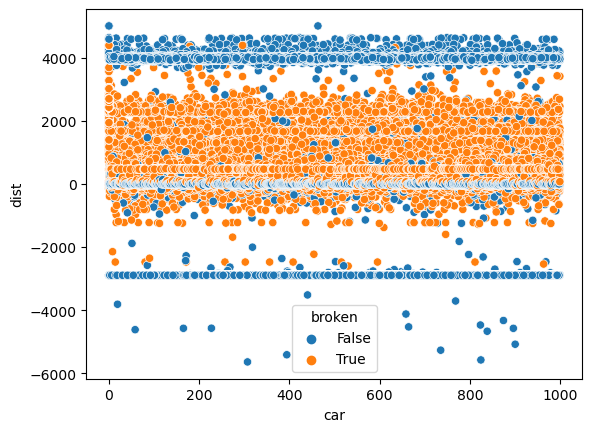

In [11]:
# Pour cette partie nous allons utiliser seaborn en plus de matplotlib

sns.scatterplot(data=bigCars, x="car", y="dist", hue="broken")
# 1 500 000 points... C'est peut-être beaucoup


### <a id="3.3">[3.3 Evolution de la distribution empirique](#toc)</a>

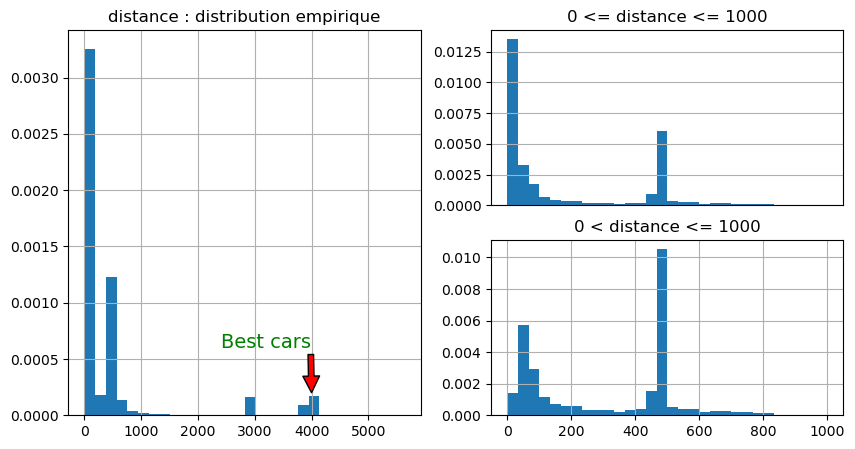

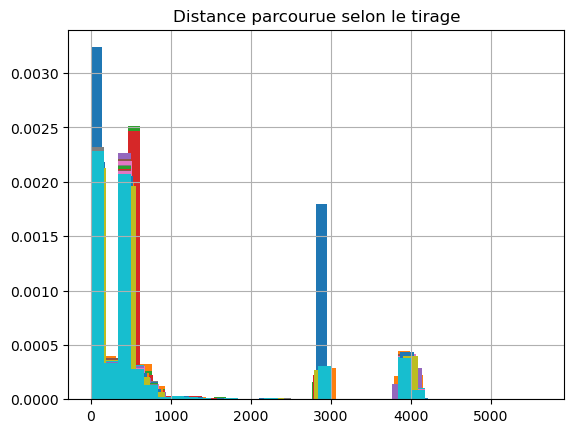

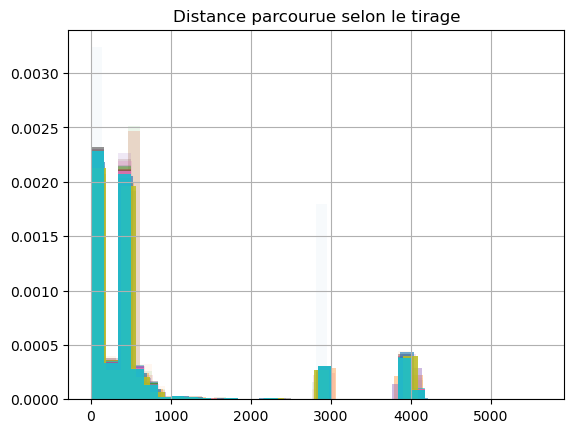

In [12]:
# On constate que les voitures ont tendance à aller plus loin quand elles ne sont pas cassées...
# Disons que ça a le mérite de ne pas contredire la logique. 

# Utilisons une représentation plus classique de la distribution empirique

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
bigCars["dist"].abs().hist(density=True, bins=30)
plt.title("distance : distribution empirique")
plt.annotate('Best cars', xy = (4000, 0.0002), 
             fontsize = 14, xytext = (2400, 0.0006), 
             arrowprops = dict(facecolor = 'red'),
             color = 'g')

# Histogramme plus beau, plus précis pour les valeurs comprises entre 0 et 1000
plt.subplot(2, 2, 2)
bigCars[bigCars.dist.abs() < 1000]["dist"].hist(density=True,bins=30,range=(0,1000))
plt.title("0 <= distance <= 1000")
plt.xticks(ticks=[])

# non-nuls : si on souhaite ne pas prendre en compte les voitures qui ne bougent/consomment pas
movingBigCars = bigCars.query('dist != 0')
# movingBigCars["dist"].abs().hist(density=True, bins=30)
# plt.title("distance > 0")

# Histogramme plus beau, plus précis pour les valeurs comprises entre 1 et 1000
plt.subplot(2, 2, 4)
movingBigCars[movingBigCars.dist.abs() < 1000]["dist"].hist(density=True,bins=30,range=(0,1000))
plt.title("0 < distance <= 1000")
plt.show()


# Décomposons en fonction du tirage pour voir l'évolution
subsets_movingBigCars = []
for t in movingBigCars["tir"].unique():
    subsets_movingBigCars.append(movingBigCars.loc[movingBigCars.tir == t, :])
    subsets_movingBigCars[t - 1]["dist"].abs().hist(density=True, bins=30)
plt.title("Distance parcourue selon le tirage")
plt.show()

# Utilisons la transparence pour "effacer" les premiers tirages
subsets_movingBigCars = []
for t in movingBigCars["tir"].unique():
    subsets_movingBigCars.append(movingBigCars.loc[movingBigCars.tir == t, :])
    subsets_movingBigCars[t - 1]["dist"].abs().hist(density=True, bins=30, alpha=t*0.03)
plt.title("Distance parcourue selon le tirage")
plt.show()


### <a id="3.4">[3.4 Mesures de tendance centrale, dispersion, forme](#toc)</a>

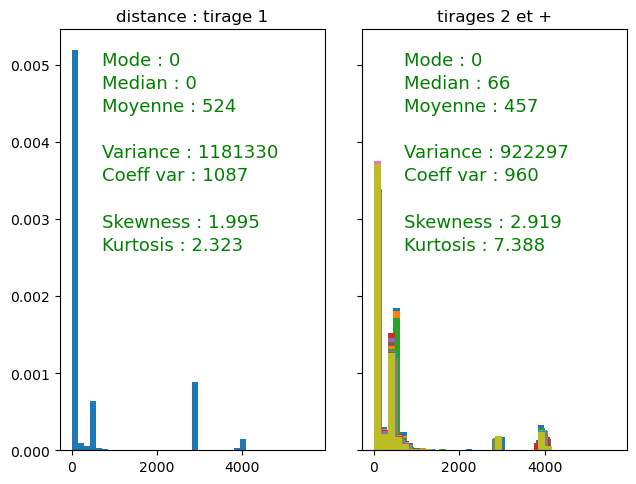

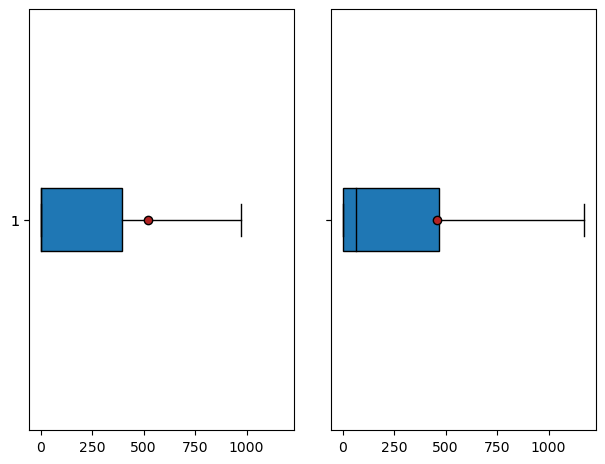

In [13]:
# Analysons un peu plus en détail notre variable
# A l'exception du premier tirage (couleur navy blue ci-dessus, puis disparait),
# les histogrammes ont des formes très similaires. Nous allons donc différencier ces deux cas.

subset_tirage1 = bigCars.query('tir == 1').abs()
subset_tirages2_30 = bigCars.query('tir > 1').abs()


f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
f.tight_layout()
ax1.hist(subset_tirage1["dist"], density=True, bins=30)
ax1.set_title("distance : tirage 1")
ax1.annotate('Mode : 0', xy = (0, 0),
             fontsize = 13, xytext = (700, 0.005),
             color = 'g')
ax1.annotate('Median : 0', xy = (0, 0),
             fontsize = 13, xytext = (700, 0.0047),
             color = 'g')
ax1.annotate('Moyenne : 524', xy = (0, 0),
             fontsize = 13, xytext = (700, 0.0044),
             color = 'g')
ax1.annotate('Variance : 1181330', xy = (0, 0),
             fontsize = 13, xytext = (700, 0.0038),
             color = 'g')
ax1.annotate('Coeff var : 1087', xy = (0, 0),
             fontsize = 13, xytext = (700, 0.0035),
             color = 'g')
ax1.annotate('Skewness : 1.995', xy = (0, 0),
             fontsize = 13, xytext = (700, 0.0029),
             color = 'g')
ax1.annotate('Kurtosis : 2.323', xy = (0, 0),
             fontsize = 13, xytext = (700, 0.0026),
             color = 'g')

subsets_tirages = []
for t in subset_tirages2_30["tir"].unique():
    subsets_tirages.append(subset_tirages2_30.loc[subset_tirages2_30.tir == t, :])
    ax2.hist(subsets_tirages[t - 2]["dist"], density=True, bins=30)
ax2.set_title("tirages 2 et +")
ax2.annotate('Mode : 0', xy = (0, 0),
             fontsize = 13, xytext = (700, 0.005),
             color = 'g')
ax2.annotate('Median : 66', xy = (0, 0),
             fontsize = 13, xytext = (700, 0.0047),
             color = 'g')
ax2.annotate('Moyenne : 457', xy = (0, 0),
             fontsize = 13, xytext = (700, 0.0044),
             color = 'g')
ax2.annotate('Variance : 922297', xy = (0, 0),
             fontsize = 13, xytext = (700, 0.0038),
             color = 'g')
ax2.annotate('Coeff var : 960', xy = (0, 0),
             fontsize = 13, xytext = (700, 0.0035),
             color = 'g')
ax2.annotate('Skewness : 2.919', xy = (0, 0),
             fontsize = 13, xytext = (700, 0.0029),
             color = 'g')
ax2.annotate('Kurtosis : 7.388', xy = (0, 0),
             fontsize = 13, xytext = (700, 0.0026),
             color = 'g')
plt.show()

# ajouter boites à moustaches
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

f, (ax3, ax4) = plt.subplots(1, 2, sharex=True, sharey=True)
f.tight_layout()
ax3.boxplot(subset_tirage1["dist"], vert=False, showfliers=False, medianprops=medianprops, patch_artist=True, showmeans=True, meanprops=meanprops)
ax4.boxplot(subset_tirages2_30["dist"], vert=False, showfliers=False, medianprops=medianprops, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

# calcul des tendances centrales : 
#print("TIRAGE 1\n")
#print("mode")
#print(subset_tirage1['dist'].mode())
#print("médian")
#print(subset_tirage1['dist'].median())
#print("moyenne")
#print(subset_tirage1['dist'].mean())
#print("\nTIRAGE 2+\n")
#print("mode")
#print(subset_tirages2_30['dist'].mode())
#print("médian")
#print(subset_tirages2_30['dist'].median())
#print("moyenne")
#print(subset_tirages2_30['dist'].mean())
  
# dispersion : 
#print("\nvariance empirique (corrigée)")
#print(subset_tirage1['dist'].var(ddof=0))
#print(subset_tirages2_30['dist'].var(ddof=0))
#print("coefficient de variation (écart-type empirique / moyenne)")
#print(subset_tirage1['dist'].std(ddof=0))
#print(subset_tirages2_30['dist'].std(ddof=0))

# L'écart standard s'exprime dans la même unité que notre variable.
# Quelle est cette unité, d'ailleurs : des pixels par frame ? 
  
# forme     
#print("\nskewness")      
#print(subset_tirage1['dist'].skew())
#print(subset_tirages2_30['dist'].skew())
#print("kurtosis") 
#print(subset_tirage1['dist'].kurtosis())
#print(subset_tirages2_30['dist'].kurtosis())


> &emsp; Interprétation : les histogrammes montrent 4 pics particuliers. <br>
> &emsp; Au premier tour, la majorité des voitures n'avance pas (en raison notamment des seuils d'activation
des neurones). Ce nombre diminue grandement dès le tour 2, mais reste important. Le second pic, proche de 0, caratérise les voitures qui heurtent très vite les bords de la route ou le premier obstacle. Il devient le barrage principal à partir du tour 2. On constate de nets progrès en ce qui concerne le troisième pic : il ne constitue plus un obstacle presqu'infranchissable ; davantage de voitures atteignent les 4000 px de distance. On peut s'étonner que la moyenne baisse. Cela est sans doute lié au fait que notre algorithme privilégie seulement la performance de la meilleure voiture. <br>
> &emsp; Les indicateurs de dispersion, très élevés, montrent que les indicateurs de tendances centrale sont peu robustes ici. Seul le mode est relativement pertinent. Ils diminuent cependant légèrement après le premier tirage, qui est "le plus aléatoire". <br>
> &emsp; Le skewness et le kurtosis confirment aussi ce que l'on peut observer sur les histogrammes :
Nos distributions sont trés étalées à droite de la moyenne, et les courbes sont moins aplaties que la distribution normale : les observations sont plus concentrées.

> &emsp; En conclusion, le mieux qu'on puisse faire est de s'assurer en début de tirage que les voitures ont la quantité d'énergie nécessaire pour parcourir la distance maximale possible (environ 5 000 px). On peut installer un système d'alerte dans ce but. Seules quelques voitures en auront besoin, la majorité d'entre elles consommant très peu et pouvant donc probablement réaliser plusieurs tirages avant de nécessiter une recharge.


### <a id="3.5">[3.5 Mesures de concentration](#toc)</a>

tirage 1


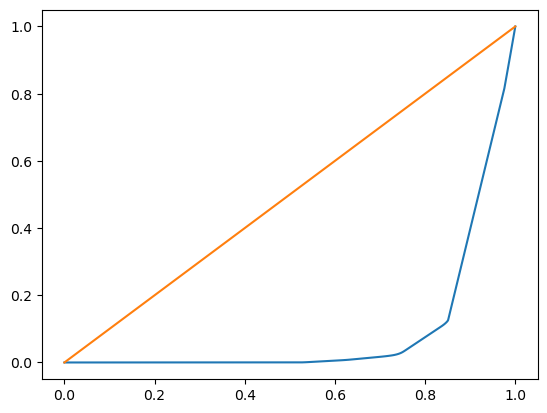

0.8183863287748789

tirages 2+


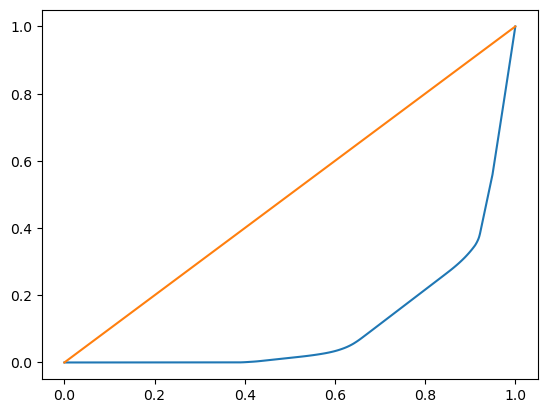

0.7735373790474311

In [14]:
# En conclusion, pas facile d'estimer la quantité d'énergie à prévoir ! Pour que l'expérience se déroule bien, 
# la plupart des voitures auront donc bien plus de carburant ou de batterie que nécessaire. 
# Seules quelques-unes consomment beaucoup. 

# La courbe de Lorenz représente particulièrement bien le caractère très inégalitaire de cette distribution 
# Encore accentué ici puisqu'on prend en compte seulement la distance finale.
print("tirage 1")
dist = subset_tirage1['dist'].values
n = len(dist)
lorenz = np.cumsum(np.sort(dist)) / dist.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot(np.arange(2),[x for x in np.arange(2)])
plt.show() 
   
# calcul de l'indice de Gini
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
print(gini)
# sans surprise

print("\ntirages 2+")
dist = subset_tirages2_30['dist'].values
n = len(dist)
lorenz = np.cumsum(np.sort(dist)) / dist.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot(np.arange(2),[x for x in np.arange(2)])
plt.show() 
   
# calcul de l'indice de Gini
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

### <a id="4.1">[4.1 Corrélation ? Distance / temps de survie](#toc)</a>

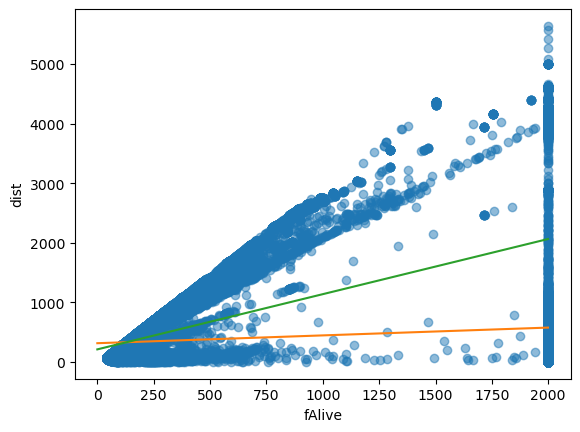

pearsonr :
0.1275664496702616
cov :
114496.36816166293

pearsonr :
0.643926758696034
cov :
567186.4616899207


In [15]:
X = subset_tirages2_30[['fAlive']]
Y = subset_tirages2_30["dist"]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['fAlive'],result.params['intercept']

subset2 = subset_tirages2_30.loc[subset_tirages2_30['dist'] > 0, :] # sans les outsiders, bien mieux !
X = subset2[['fAlive']]
Y = subset2["dist"]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
c,d = result.params['fAlive'],result.params['intercept']

plt.plot(subset_tirages2_30["fAlive"],subset_tirages2_30["dist"],'o', alpha=0.5)
plt.plot(np.arange(2000),[a*x+b for x in np.arange(2000)])
plt.plot(np.arange(2000),[c*x+d for x in np.arange(2000)])
plt.xlabel("fAlive")
plt.ylabel("dist")
plt.show()

print("pearsonr :")
print(st.pearsonr(subset_tirages2_30["fAlive"],subset_tirages2_30["dist"])[0])
print("cov :")
print(np.cov(subset_tirages2_30["fAlive"],subset_tirages2_30["dist"],ddof=0)[1,0])
print("\npearsonr :")
print(st.pearsonr(subset2["fAlive"],subset2["dist"])[0])
print("cov :")
print(np.cov(subset2["fAlive"],subset2["dist"],ddof=0)[1,0])


### <a id="4.2">[4.2 Distance / classement](#toc)</a>

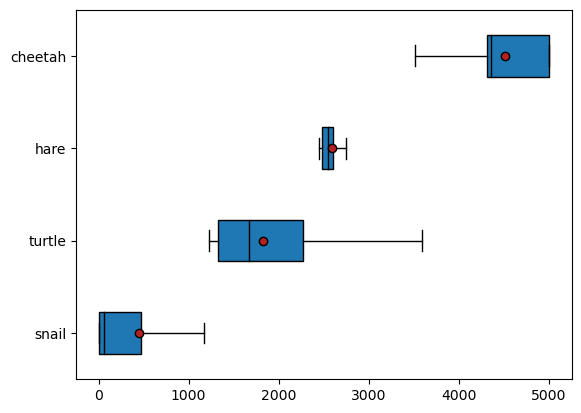

0.01550924809625468

In [16]:
# A partir du score, nous pouvons créer une variable qualitative. Classons nos voitures en 4 catégories
subset_tirages2_30["classement"] = subset_tirages2_30["score"]

# Catégorie 1 : les "escargots" qui n'ont passé aucun obstacle, ou 1 seul
subset_tirages2_30.loc[subset_tirages2_30.score < 2, 'classement'] = "snail"
# Catégorie 2 : les "tortues"
subset_tirages2_30.loc[subset_tirages2_30.score >= 2, 'classement'] = "turtle"
# Catégorie 3 : les "lièvres"
subset_tirages2_30.loc[subset_tirages2_30.score >= 4, 'classement'] = "hare"
# Catégorie 4 : les "guépards"
subset_tirages2_30.loc[subset_tirages2_30.score >= 6, 'classement'] = "cheetah"

subset_tirages2_30["classement"] = subset_tirages2_30["classement"].astype("category")

modalites = subset_tirages2_30["classement"].unique()
groupes = []
for m in modalites:
    groupes.append(subset_tirages2_30[subset_tirages2_30["classement"]==m]["dist"])
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(subset_tirages2_30["classement"], subset_tirages2_30["dist"] )
# Très proche de 0. Pas de corrélation évidente selon cet indicateur.


### <a id="4.3">[4.3 Survie / classement](#toc)</a>

classement,cheetah,hare,snail,turtle,Total
broken,,,,,
False,26.0,NaN,739303.0,369.0,739698
True,44.0,742.0,701381.0,8135.0,710302
Total,70.0,742.0,1440684.0,8504.0,1450000


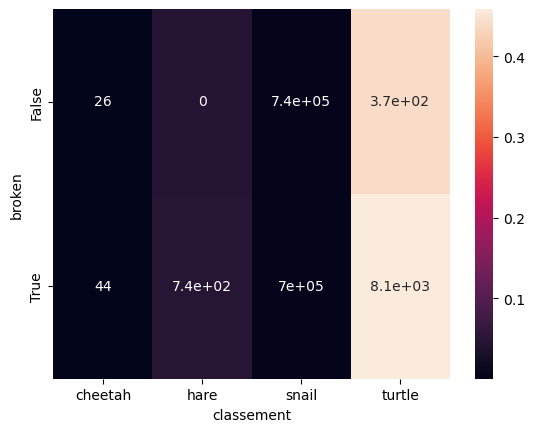

In [17]:
Y = "classement" # category
X = "broken" # boleen

cont = subset_tirages2_30[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
display(cont)

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(subset_tirages2_30)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

# Trop d'outliers chez les tortues
# La heatmap montre que la corrélation, si elle existe, tend à s'inverser : 
# Parmi les voitures les plus lentes, on dénombre une vaste majorité de voitures cassées (environ 8100 contre 370).
# Chez les plus rapides, on compte au contraire 44 voitures intactes contre 26 véhicules endommagés, soit presque le double.


### <a id="4.4">[Conclusion](#toc)</a>

> &emsp; Grâce à nos outils d'analyse statistique, nous pouvons donc facilement faire parler nos données. Cela permet de visulaliser les résultats, et aide à comprendre les liens qui peuvent unir différentes variables. Dans l'exemple que nous venons d'étudier ensemble, je dirais même que cette analyse a constitué non pas l'étape finale, mais plutôt l'étape centrale : elle nous a en effet permis de corriger notre simulation, de comprendre quelles améliorations lui seraient utiles, et découvrir des questions intéressantes.


### <a id="5.1">[Annexes](#toc)</a>

> &emsp; Dans le document ci-joint, je teste trois outils que je n'ai pas utilisés dans la présente étude, mais qui pourraient être très utiles pour d'autres projets : 

> &emsp; - ydata_profiling pour commencer très vite à explorer un jeu de données. <br>
> &emsp; - Le graphique en 3D : pas vraiment utile dans un notebook, puisqu'il est affiché sous forme de projection 2D. Il est cependant possible de l'ouvrir avec pycharm par exemple. <br>
> &emsp; - bokeh pour des graphiques interactifs.


### <a id="5.2">[Ressources](#toc)</a>

> &emsp; Ce projet de reporting s'appuie essentiellement sur deux cours disponible sur [openclassroom](https://openclassrooms.com/fr/) :

> &emsp; - [Découvrez les librairies python pour la data science](https://openclassrooms.com/fr/courses/7771531-decouvrez-les-librairies-python-pour-la-data-science), <br>
> &emsp; - et [Nettoyez et analysez votre jeu de données](https://openclassrooms.com/fr/courses/7410486-nettoyez-et-analysez-votre-jeu-de-donnees).

> &emsp; Pour m'entrainer, j'ai aussi consulté le travail de plusieurs data scientists, en particulier [Rob Mulla](https://github.com/RobMulla).
